# Purpose

I have two goals for this project:

1. To help you master data manipulation and visualization
1. To help you understand the risk-return tradeoff for several measures of risk

# Tasks

## Packages and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

## Data

I used the following code cell to download the data for this project.
Leave this code cell commented out and use the CSV files I provided with this notebook.

In [3]:
# import yfinance as yf
# import pandas_datareader as pdr
# import requests_cache
# session = requests_cache.CachedSession(expire_after=1)

In [4]:
# wiki = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')

In [5]:
# (
#     yf.Tickers(
#         tickers=wiki[2]['Ticker'].str.replace(pat='.', repl='-', regex=False).to_list(),
#         session=session
#     )
#     .history(period='max', auto_adjust=False)
#     .assign(Date = lambda x: x.index.tz_localize(None))
#     .set_index('Date')
#     .rename_axis(columns=['Variable', 'Ticker'])
#     ['Adj Close']
#     .pct_change()
#     .loc['1962':'2022']
#     .to_csv('returns.csv')
# )

In [6]:
# (
#     pdr.DataReader(
#         name='F-F_Research_Data_Factors_daily',
#         data_source='famafrench',
#         start='1900',
#         session=session
#     )
#     [0]
#     .rename_axis(columns='Variable')
#     .div(100)
#     .loc['1962':'2022']
#     .to_csv('ff.csv')
# )

Run the following code cell to read the data for this project.
The `returns.csv` file contains daily returns for the Russell 1000 stocks from 1962 through 2022, and the `ff.csv` contains daily Fama and French factors from 1962 through 2022.

In [7]:
returns = pd.read_csv('returns.csv', index_col='Date', parse_dates=True)
ff = pd.read_csv('ff.csv', index_col='Date', parse_dates=True)

## Single Stocks

For this section, use the single stock returns in `returns`.
You may select years $t$ and $t+1$, but only use stocks with complete returns data for years $t$ and $t+1$.

### Task 1: Do mean returns in year $t$ predict mean returns in year $t+1$?

In [8]:
df_1 = returns.loc['2017':'2018'].dropna(axis=1).resample('A').mean()

In [9]:
df_1

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACHC,...,XPO,XRAY,XYL,YUM,Z,ZBH,ZBRA,ZG,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,0.0016,0.0029,0.0006,-0.0018,0.0016,0.0019,0.0008,0.0017,0.0002,0.0003,...,0.0032,0.0006,0.0014,0.0011,0.0007,0.0007,0.0009,0.0006,0.0008,0.0013
2018-12-31,0.0002,-0.0024,-0.0016,0.0020,-0.0001,0.0002,-0.0006,0.0011,-0.0004,-0.0006,...,-0.0014,-0.0020,0.0001,0.0006,-0.0005,-0.0005,0.0020,-0.0005,-0.0007,0.0008


<AxesSubplot:xlabel='2017-12-31', ylabel='2018-12-31'>

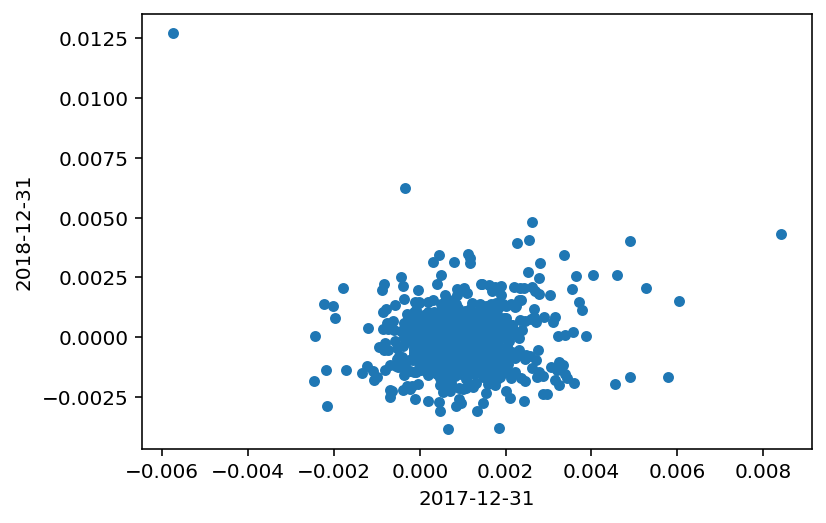

In [10]:
df_1.T.plot(x='2017-12-31', y='2018-12-31', kind='scatter')

In [11]:
.07**2

0.0049

In [12]:
df_1 = returns.loc['2017':'2018'].dropna(axis=1).resample('A').std()

In [13]:
df_1.T.corr()

Date,2017-12-31,2018-12-31
Date,,
2017-12-31,1.0000,0.8161
2018-12-31,0.8161,1.0000


In [14]:
.07**2

0.0049

In [15]:
def mean_return(returns, tickers, start_date, end_date):
    result = {}
    for ticker in tickers:
        t = returns[ticker].loc[start_date:end_date]
        t_mean = t.mean() * 252 * 100  #add correlation function 
        result[ticker] = t_mean
    return result

In [16]:
tickers = ['AAPL', 'GOOG', 'MSFT', 'A', 'AA']
result = mean_return(returns, tickers, start_date = '2017-12-31', end_date= '2018-12-31')
print(result)

{'AAPL': -1.4429853931918435, 'GOOG': 2.9200338510543955, 'MSFT': 22.948449293604945, 'A': 5.333565889634825, 'AA': -60.601604188428546}


In [17]:
# def mean_return(returns, start_date, end_date):
#     t = returns.loc[start_date:end_date]
#     t_mean = t.mean() * 252 * 100
#     return t_mean

In [18]:
#mean_return(returns, 'AAPL', 'GOOG', 'MSFT', 'A', 'AA', start_date = '2016-01-01', end_date = '2016-12-31')

In [19]:
# aapl_mean_return = mean_return(returns, 'AAPL', '2016-01-01', '2016-12-31')
# print(aapl_mean_return)

In [20]:
# t = (returns.AAPL.loc['2016-01-01':'2016-12-31'])
# #t1= returns.AAPL.loc['2017-01-01':'2017-12-31']
# t_mean = t.mean()
# #t1_mean =t1.mean()

In [21]:
# t_mean

In [22]:
#t1_mean

### Task 2: Does volatility in year $t$ predict volatility in year $t+1$?

In [23]:
def vol_returns(returns, start_date, end_date):
    s = returns.loc[start_date:end_date]
    v = np.sqrt(252)*s.std()
    return v
v = vol_returns(returns, '2017-01-01', '2017-12-31')
v

A      0.1659
AA     0.3748
AAL    0.2863
AAP    0.3940
AAPL   0.1761
        ...  
ZI        NaN
ZION   0.2259
ZM        NaN
ZS        NaN
ZTS    0.1482
Length: 1010, dtype: float64

In [24]:
# def vol_returns(returns, ticker, start_date, end_date):
#     s = returns[ticker].loc[start_date:end_date].dropna()
#     v = np.sqrt(252)*s.std()
#     return v
# v = vol_returns(returns, 'AAPL', '2016-01-01', '2016-12-31')
# v

In [25]:
#v = np.sqrt(252)*t.std()
#v1 = t1.std()

In [26]:
#v

In [27]:
#v1

### Task 3: Do Sharpe Ratios in year $t$ predict Sharpe Ratios in year $t+1$?

In [28]:
# rf =ff['RF'].loc['2016-01-01':'2016-12-31'].mean()
# t_mean = (returns.AAPL.loc['2016-01-01':'2016-12-31']).mean()
#sr = ((returns.AAPL.loc['2016-01-01':'2016-12-31']) - rf )/v
#(returns.AAPL.loc['2016-01-01':'2016-12-31'])

In [29]:
MK_RF = ff['Mkt-RF'].loc['2017-01-01': '2017-12-31'].mean()
MK_RF/ v 

A      0.0047
AA     0.0021
AAL    0.0027
AAP    0.0020
AAPL   0.0045
        ...  
ZI        NaN
ZION   0.0035
ZM        NaN
ZS        NaN
ZTS    0.0053
Length: 1010, dtype: float64

In [30]:
sharpe = MK_RF/v
sharpe

A      0.0047
AA     0.0021
AAL    0.0027
AAP    0.0020
AAPL   0.0045
        ...  
ZI        NaN
ZION   0.0035
ZM        NaN
ZS        NaN
ZTS    0.0053
Length: 1010, dtype: float64

In [31]:
#sr1

In [32]:
# def sharpe(ri, rf=ff['RF'].loc['2016-01-01':'2016-12-31']):
#     ri_rf = ri.sub(rf).dropna()
#     return np.sqrt(252) * ri_rf.mean() / ri_rf.std()

In [33]:
#returns_2016 = returns.loc['2016-01-01':'2016-12-31']

In [34]:
#sharpe(returns['AAPL'])

In [35]:
# def sharpe(ri, rf=ff['RF']):
#     ri_rf = ri.sub(rf).dropna()
#     return np.sqrt(252) * ri_rf.mean() / ri_rf.std()

In [36]:
# def sharpe_ratio(r):
#     return np.sqrt(252) * r.mean() / r.std()

In [37]:
# def sharpe_ratio(returns, rf):
#     t_mean = (returns.loc['AAPL']['2016-01-01':'2016-12-31']).mean()
#     t_std = returns.loc['2016-01-01':'2016-12-31'].std()
#     excess_returns = ff['Mkt-RF'].loc['2016-01-01':'2016-12-31'].mean()
#     sharpe_ratio = np.sqrt(252) * excess_returns / t_std
#     return sharpe_ratio

In [38]:
# rf =ff['RF'].loc['2016-01-01':'2016-12-31'].mean()
# sharpe_ratio(aapl_mean_return, rf)

In [39]:
def sharpe_ratio(returns, start_date, end_date):
    t_std = returns.loc[start_date:end_date].std()*np.sqrt(252)
    excess_returns = ff['Mkt-RF'].loc[start_date:end_date].mean() * np.sqrt(252)
    sharpe_ratio =  (excess_returns / t_std)
    return sharpe_ratio

In [40]:
sharpe_ratio(returns, '1996-01-01', '2016-12-31')

A      0.0106
AA     0.0120
AAL    0.0068
AAP    0.0154
AAPL   0.0107
        ...  
ZI        NaN
ZION   0.0110
ZM        NaN
ZS        NaN
ZTS    0.0204
Length: 1010, dtype: float64

### Task 4: Do CAPM betas in year $t$ predict CAPM betas in year $t+1$?

In [41]:
# mkt_rf_mean = ff['Mkt-RF'].loc['2016-01-01':'2016-12-31'].mean()
# mkt_rf_mean1 = ff['Mkt-RF'].loc['2017-01-01':'2017-12-31'].mean()
# #CAPM 
# beta = (t_mean-rf)/mkt_rf_mean
# #beta1 = (t1_mean-rf)/mkt_rf_mean1

In [42]:
#beta

In [43]:
#beta1

In [44]:
def calc_beta(returns, ff_data, rf_rate):
    mkt_rf_mean = ff['Mkt-RF'].loc['2017-01-01': '2017-12-31'].mean()
    t_mean = (returns.loc['2017-01-01': '2017-12-31']).mean()
    beta = (t_mean - rf_rate) / mkt_rf_mean
    return beta

aapl_returns = returns['AAPL'].loc['2017-01-01': '2017-12-31']
ff_data = ff['Mkt-RF'].loc['2017-01-01': '2017-12-31'].mean()
rf_rate =ff['RF'].loc['2017-01-01': '2017-12-31'].mean()

aapl_beta = calc_beta(aapl_returns, ff_data, rf_rate)
print(aapl_beta)

2.0428066727029623


### Task 5: Does volatility in year $t$ predict *mean returns* in year $t+1$?

In [87]:
#_ = pd.MultiIndex.from_product([['Returns'], returns['Adj Close'].columns])

In [88]:
# # Created a funtion to compute volatility
# def vol1_return(returns, tickers, start_date, end_date):
#     result = {}
#     for ticker in tickers:
#         s = returns[ticker].loc[start_date:end_date].resample('A')
#         v = s.std() * 100
#         result[ticker] = v
#     return result

# tickers = ['AAPL']
# result = vol1_return(returns, tickers, start_date = '2017-01-01', end_date= '2017-12-31')
# result

{'AAPL': Date
 2017-12-31   1.1091
 Freq: A-DEC, Name: AAPL, dtype: float64}

In [90]:
def vol1_return(returns, tickers, start_date, end_date):
    result = {}
    for ticker in tickers:
        s = returns[ticker].loc[start_date:end_date].resample('A')
        v = s.std() * 100
        result[ticker] = v
    return result

tickers = ['AAPL']
result = vol1_return(returns, tickers, start_date = '2017-01-01', end_date= '2017-12-31')
result

{'AAPL': Date
 2017-12-31   1.1091
 Freq: A-DEC, Name: AAPL, dtype: float64}

In [47]:
vol11 = returns.loc['2017-01-01':'2017-12-31'].std().dropna
mean11 = returns.loc['2018-01-01':'2018-12-31'].mean().dropna * 252


TypeError: unsupported operand type(s) for *: 'method' and 'int'

In [ ]:
mean11

ValueError: x and y must be the same size

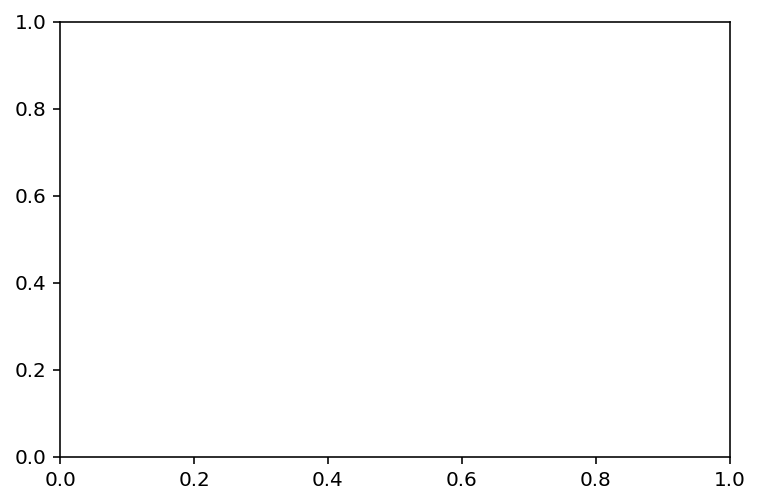

In [107]:
#corr = np.corr(vol11,mean11)
plt.scatter(x=vol11, y= mean11)
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
#plt.slabel('Correlation among both')
plt.title('Scatter Plot of Volitality v/s Mean Returns (2018)')
plt.show()

In [96]:
corr = np.corrcoef(vol11, mean11)[0,1]
plt.scatter(x=vol11, y=mean11, s=50, alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.slabel('Corr')
plt.title(f'Scatter Plot of Volatility vs. Mean Returns (2018)\nCorrelation: {corr:.2f}')
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 880 and the array at index 1 has size 901

### Task 6: Does CAPM beta in year $t$ predict *mean returns* in year $t+1$?

In [ ]:
help(plt.scatter)

## Portfolios I

For this section, create 100 random portfolios of 50 stocks each from the daily returns in `returns`.
Equally weight these portfolios and rebalance them daily.
Use the same stocks and years $t$ and $t+1$ as the previous section.

### Task 7: Does volatility in year $t$ predict *mean returns* in year $t+1$?

In [64]:
# import random
# #a = returns[random.sample(returns.index, 100)]
# column = returns.columns
# batch = []
# year = returns.index.to_frame(index=False)
# for i in range(100):
#     if year is not None:
#         returns = returns.loc[str(year)]
#     portfolios = np.random.choice(column, 50)
#     batch.append(portfolios)
# batch = np.array(batch)
# for j in range(1):
#     print(returns[batch[j]])

KeyError: '            Date\n0     1962-01-02\n1     1962-01-03\n2     1962-01-04\n3     1962-01-05\n4     1962-01-08\n...          ...\n15351 2022-12-23\n15352 2022-12-27\n15353 2022-12-28\n15354 2022-12-29\n15355 2022-12-30\n\n[15356 rows x 1 columns]'

In [42]:
returns.index.to_frame(index=False)

,Date
0,1962-01-02
1,1962-01-03
2,1962-01-04
3,1962-01-05
4,1962-01-08
...,...
15351,2022-12-23
15352,2022-12-27
15353,2022-12-28
15354,2022-12-29


In [145]:
 def get_random_portfolios(returns, year=None):
    if year is not None:
        returns = returns.loc[str(year)]
    column = returns.columns
    batch = []
    for i in range(100):
        portfolios = np.random.choice(column, 50)
        batch.append(portfolios)
    
    batch = np.array(batch)
    results = []
    for j in range(len(batch)):
        results.append(returns[batch[j]])
    return results

In [146]:
random_portfolios = get_random_portfolios(returns, year=2021)
random_portfolios

[               IVZ     WRK     ACN     REG    ATUS     AJG     TFX    PFGC  \
 Date                                                                         
 2021-01-04 -0.0275 -0.0248 -0.0182 -0.0290 -0.0306 -0.0280 -0.0205 -0.0239   
 2021-01-05  0.0301  0.0250  0.0057  0.0007  0.0027 -0.0067 -0.0067  0.0168   
 2021-01-06  0.0544  0.0630  0.0109  0.0293  0.0030  0.0208  0.0115  0.0582   
 2021-01-07 -0.0043 -0.0091  0.0094 -0.0129 -0.0027  0.0033 -0.0031 -0.0240   
 2021-01-08  0.0175 -0.0131  0.0036  0.0107 -0.0285 -0.0121  0.0238 -0.0166   
 ...            ...     ...     ...     ...     ...     ...     ...     ...   
 2021-12-27  0.0090  0.0177  0.0298  0.0095 -0.0037  0.0240  0.0115  0.0168   
 2021-12-28 -0.0008  0.0098 -0.0001  0.0042  0.0143 -0.0066 -0.0034 -0.0115   
 2021-12-29 -0.0072  0.0020  0.0004  0.0058 -0.0049  0.0029  0.0111  0.0033   
 2021-12-30 -0.0064 -0.0014 -0.0038  0.0067  0.0234 -0.0062 -0.0084  0.0000   
 2021-12-31 -0.0082  0.0032  0.0017  0.0075 -0.0259 

In [46]:
def get_random_portfolios(returns, num_portfolios=100, num_assets=50, start_date = None , end_date = None):
    columns = returns.columns[2016:2017].dropna()
    batches = []
    for i in range(num_portfolios):
        portfolios = np.random.choice(columns, num_assets)
        batches.append(portfolios)
    batches = np.array(batches)
    for j in range(10):
        print(returns[batches[j]])

In [ ]:
def batch_volatility(returns, stock_batch, no_stocks, no_portfolios, start_date, end_date):
    volatilities = []

    for j in range(no_portfolios):
        _return = (returns[batch[j]]).loc[start_date:end_date]

        weights = np.ones((no_stocks, 1)) * (1 / no_stocks)

        # changing the numerous nan values to zero
        _return.replace(np.NaN, 0, inplace=True)

        # print(return_2015.to_numpy().shape)

        # Converting the dataframe to numpy array and performin dot product with weight values
        portfolio_returns = _return.to_numpy() @ weights

        # print(portfolio_returns)

        # calculating standard deviation
        volatility = portfolio_returns.std()

        # print(volatility)

        volatilities.append(volatility)

    return volatilities



In [ ]:
batch = []
column = returns.columns
no_portfolios = 100
no_stocks = 50
for i in range(no_portfolios):
    portfolios = np.random.choice(column, no_stocks, replace=False)
    batch.append(portfolios)
batch = np.array(batch)

batch_2015 = batch_volatility(returns, stock_batch=batch, no_stocks=no_stocks, no_portfolios=no_portfolios, start_date='2015-01-01', end_date='2015-12-31')
batch_2016 = batch_volatility(returns, stock_batch=batch, no_stocks=no_stocks, no_portfolios=no_portfolios, start_date='2016-01-01', end_date='2016-12-31')

batch_2015

In [ ]:
# plot lines
plt.plot(batch_2015, label = "Volatility 2015")
plt.plot(batch_2016, label = "Volatility 2016")
plt.title("Portfolio Volatility of both years")
plt.legend()
plt.show()

ValueError: 'a' cannot be empty unless no samples are taken

In [67]:
# import random
# #a = returns[random.sample(returns.index, 100)]
# column = returns.columns
# batch = []
# for i in range(100):
#     portfolios = np.random.choice(column, 50)
#     batch.append(portfolios)
# batch = np.array(batch)
# for j in range(10):
#     print(returns[batch[j]])

In [68]:
# column = returns.columns
# batch = []
# for i in range(100):
#     portfolios = np.random.choice(column, 50, replace=True) # added 'replace=False' to select without replacement
#     batch.append(portfolios)
# batch = np.array(batch)
# for j in range(50):
#     # Remove NaN values from the selected rows
#     selected_rows = returns[batch[j]].dropna()
#     print(selected_rows)

### Task 8: Does CAPM beta in year $t$ predict *mean returns* in year $t+1$?

In [65]:
def cal_beta(returns, start_date, end_date, num_portfolio=100, num_assets=50):
    col = returns.loc[start_date : end_date].dropna(axis = 1)
    if col.shape[1] == 0:
        return np.nan
    batches = []
    for i in range(num_portfolio):
        portfolios = np.random.choice(col.columns, num_assets)
        batches.append(col[portfolios])
    beta_values = []
    mkrt_rf_mean = ff['Mkt-RF'].mean()
    if mkrt_rf_mean == 0 or np.isnan(mkrt_rf_mean):
        return np.nan
    for batch in batches:
        t_mean = batch.mean(axis=1).dropna()
        rf_rate = ff['RF'].loc[t_mean.index]
        if t_mean.shape[0] == 0 or rf_rate.shape[0] == 0:
            continue
        beta = (t_mean - rf_rate) / mkrt_rf_mean
        beta = beta.replace([np.inf, -np.inf], np.nan).dropna()
        if beta.shape[0] > 0:
            beta_values.append(beta.mean())
    if len(beta_values) == 0:
        return np.nan
    return np.mean(beta_values)

In [68]:
cal_beta(returns, '2018-01-01','2019-12-31')

2.0921

In [69]:
def totret(x):
    return (1 + x).prod() - 1

In [70]:
returns_mr = (
    returns
    .resample(rule='M', kind='period') # aggregate from daily to monthly
    .apply(totret) # ...calculate total returns
    .rolling(12) # aggregate into 12-month rolling windows
    .apply(totret) # ...calculate total returns
)

## Portfolios II

Calculate monthly volatility and total return for *every stock* and *every month* in `returns`.
Drop stock-months with fewer than 15 returns.
Each month, assign these stocks to one of five portfolios based on their volatility during the previous month.
Equally weight these portfolios and rebalance them monthly.

### Task 9: Do high volatility portfolios have high mean returns and Sharpe Ratios?

In [49]:
volatility = returns.groupby().rolling(window=12).std()
total_return = (1 + returns).groupby().cumprod()
metrics = pd.concat([volatility.tail(1), total_return.tail(1)], axis=1)
metrics = metrics[metrics.groupby('stock')['price'].transform('count') >= 15]
quantiles = pd.qcut(metrics['price'], 5, labels=False) + 1
portfolio_weights = pd.DataFrame({'weight': 1/quantiles.groupby('stock').count()}).reset_index()
portfolio_weights['month'] = metrics.index.get_level_values(1).max()
portfolio_weights.set_index(['stock', 'month'], inplace=True)

TypeError: You have to supply one of 'by' and 'level'

In [56]:
monthly_volatility = returns.groupby(pd.Grouper(freq='M')).std()
total_return = (1 + returns).groupby(pd.Grouper(freq='M')).prod() - 1

monthly_volatility = monthly_volatility.dropna(thresh=15)
total_return = total_return.dropna(thresh=15)

In [57]:
total_return

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,YUM,Z,ZBH,ZBRA,ZG,ZI,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0.0000,-0.0860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1962-02-28,0.0000,0.0177,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1962-03-31,0.0000,0.0558,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1962-04-30,0.0000,-0.0391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1962-05-31,0.0000,-0.1011,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.0436,-0.0257,-0.0525,-0.1290,-0.0312,-0.0631,0.0074,0.0193,-0.0569,0.0297,...,-0.0878,-0.0407,-0.0369,-0.1567,-0.0457,0.1987,0.0159,-0.2259,0.0270,-0.1425
2022-09-30,-0.0522,-0.3197,-0.0731,-0.0647,-0.1210,-0.0019,-0.0766,-0.0714,-0.0574,-0.0039,...,-0.0440,-0.1449,-0.0144,-0.1314,-0.1428,-0.0828,-0.0758,-0.0847,0.0322,-0.0526
2022-10-31,0.1402,0.1625,0.1777,0.2148,0.1096,0.1019,0.1618,0.0178,0.0274,0.2626,...,0.1120,0.0786,0.0842,0.0810,0.0803,0.0689,0.0212,0.1338,-0.0625,0.0190


## Discussion

### Task 10: Discuss and explain any limitations of your analysis above

# Criteria

1. All tasks are worth ten points
1. Discuss and explain your findings for all ten tasks
1. Here are a few more tips
    1. ***Your goal is to convince me of your calculations and conclusions***
    1. I typically find figures most convincing
    1. If you use correlations, consider how a handful of outliers may affect your findings
    1. Remove unnecessary code, outputs, and print statements
    1. Write functions for calculations that you expect to use more than once
    1. ***I will not penalize code style, but I will penalize submissions that are difficult to follow or do not follow these instructions***
1. How to submit your project
    1. Restart your kernel, run all cells, and save your notebook
    1. Export your notebook to PDF (`File > Save And Export Notebook As ... > PDF` in JupyterLab)
        1. If this export does not work, you can either (1) Install MikTeX on your laptop with the default settings or (2) use DataCamp Workspace to export your notebook to PDF
        1. You do not need to re-run your notebook to export it because notebooks store output cells
    1. Upload your notebook and PDF to Canvas
    1. Upload your PDF only to Gradescope and tag your teammates
    1. Gradescope helps me give better feedback more quickly, but I do not consider it reliable for sharing and storing your submission files